## Regras de Associação

Encontrar padrão entre itens em uma lista de compras. <br>

Controle de evasão de clientes em X produtos <br>

Sistema de recomendação <br>

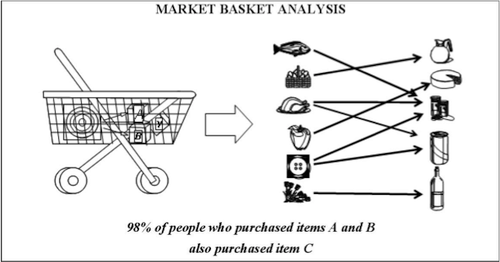

Promoções de itens que são vendidos em conjuntos.

As regras de associação permitem que elementos em um conjunto de dados sejam expressos como 𝑋→𝑌, e lê-se 𝑋 implica em 𝑌, desde que 𝑋 e 𝑌 sejam sub-conjuntos da base de dados em questão e os conjuntos de itens não tenham intereceptação entre si 𝑋∩𝑌.

O suporte =>  na frequência de vezes que uma determinada regra é aplicável a X, a confiança é a frequência na qual os elementos  de Y aparecem no conjunto de dados de trasações que ocorrem em X <br>

Itemset: Qualquer combinação desses itens forma um itemset. Pode ser um único item ou vários: <br>
{Leite} é um itemset (especificamente, um 1-itemset).<br>
{Pão, Manteiga} é um itemset (um 2-itemset).<br>
{Leite, Pão, Manteiga} é um itemset (um 3-itemset).<br>


Suporte(X) = (Número de transações contendo X) / (Total de transações) <br>

Confiança(X → Y) = (Número de transações contendo X e Y) / (Número de transações contendo X) <br>

Exemplo:
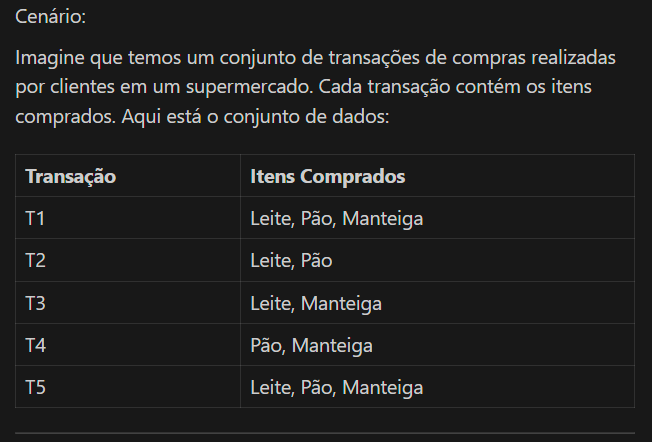
<br>



Suporte({Leite, Pão}) = 3 (leite e pao) / 5 (total de transacoes) = 0.6 (60%) <br>

Confiança(Leite → Pão) = 3 / 4 (4 leites) = 0.75 (75%)<br>

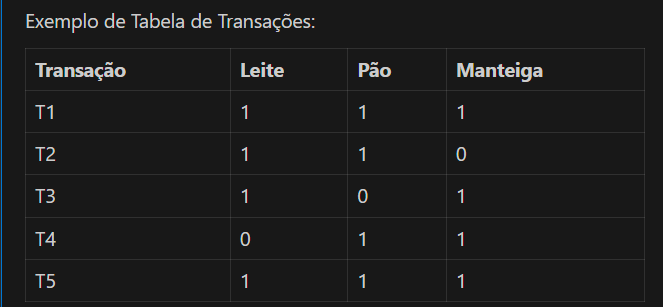
<br>



<br>
Fase 1: <br>

Descobrir todos os conjuntos de itens com suporte maior ou igual ao mínimo especificado pelo usuário. Detalhe é que Primeiro é calculado item a item, po exemplo 3 items de 10 passaram o valor do suporte, depois disso é feita a combinação de elemento a elemento para formar todos os subconjuntos e apartir deles é calculado o suporte. Exemplo de itens isolados que passaram no suporte: <br>

pao
leite
pera
<br>
monta a combinação: <br>
pao, leite <br>
pao,pera <br>
pera,leite <br>


calcula-se o suporte para eles e depois calcula-se para o subconjunto total {pao,leite,pera}



Fase 2: <br>

A partir dos conjuntos de itens frequentes, descobrir regras de associação com fator de confiança maior ou igual ao especificado pelo usuário. <br>

não necessário de conjunto de 1 item isolado exemplo {leite} => {leite} já é verdade <br>

{pao->leite} contar o registros <br> 

{leite->pao} contar os registros <br>

aplicar: <br>

Confiança(X → Y) = (Número de transações contendo X e Y) / (Número de transações contendo X)<br>

Exemplo com 3 items no itemset (todas as combinações dentro):<br> 
(pao,leite,pera)<br>
pao->leite,pera<br>
leite->pao,pera<br>
pera->pera,leite<br>
pao,leite->pera<br>
pao,pera->leite<br>
leite,pera->pao<br>

Após a seleção das regras que passam por um limiar de confiança, exemplo confiança > 0.8 <lift>

lift (A>B) (o quão mais frenquente torna-se B quando A ocorre)<br>
Lif=cofiança (A>B)/suporte(B)





In [7]:
%pip install apyori

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=6016 sha256=a8fab234361f0994af0d4ee0459c6379ce1df2a453755ddb9964369fef18c3a4
  Stored in directory: c:\users\william\appdata\local\pip\cache\wheels\c4\1a\79\20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Carga das bases

In [19]:
import pandas as pd
import numpy as np
from apyori import apriori

In [14]:
dataset_mercado= pd.read_csv('data_base/mercado.csv',header=None)
dataset_mercado2= pd.read_csv('data_base/mercado2.csv',header=None)

In [15]:
display(dataset_mercado)
display(dataset_mercado2)

,0,1,2,3
0,leite,cerveja,pao,manteiga
1,cafe,pao,manteiga,NaN
2,cafe,pao,manteiga,NaN
3,leite,cafe,pao,manteiga
4,cerveja,NaN,NaN,NaN
5,manteiga,NaN,NaN,NaN
6,pao,NaN,NaN,NaN
7,feijao,NaN,NaN,NaN
8,arroz,feijao,NaN,NaN
9,arroz,NaN,NaN,NaN


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Utils

In [108]:
def processar_regras(resultados):
    A = []
    B = []
    suporte = []
    confianca = []
    lift = []
    
    for resultado in resultados:
        for rules in resultado[2]:
            suporte.append(resultado[1])
            A.append(str(rules[0]))
            B.append(str(rules[1]))
            confianca.append(rules[2])
            lift.append(rules[3])
    
    # Criar o DataFrame
    dict_rules = {'A': A, 'B': B, 'suporte': suporte, 'confianca': confianca, 'lift': lift}
    df = pd.DataFrame(dict_rules)
    
    # Limpar as colunas A e B para extrair apenas os itens
    df['A'] = df['A'].str.extract(r"frozenset\(\{'(.*?)'\}\)")
    df['B'] = df['B'].str.extract(r"frozenset\(\{'(.*?)'\}\)")
    
    df['A'] = df['A'].str.replace("'",'')
    df['B'] = df['B'].str.replace("'",'')
    df['A'] = df['A'].str.replace(",",' e')
    df['B'] = df['B'].str.replace(",",' e')
    
    return df

## Regras base mercado1

In [16]:
transacoes = []
for i in range(0, len(dataset_mercado)):
    transacoes.append([str(dataset_mercado.values[i,j]) for j in range(0, dataset_mercado.shape[1])])

In [17]:
transacoes

[['leite', 'cerveja', 'pao', 'manteiga'],
 ['cafe', 'pao', 'manteiga', 'nan'],
 ['cafe', 'pao', 'manteiga', 'nan'],
 ['leite', 'cafe', 'pao', 'manteiga'],
 ['cerveja', 'nan', 'nan', 'nan'],
 ['manteiga', 'nan', 'nan', 'nan'],
 ['pao', 'nan', 'nan', 'nan'],
 ['feijao', 'nan', 'nan', 'nan'],
 ['arroz', 'feijao', 'nan', 'nan'],
 ['arroz', 'nan', 'nan', 'nan']]

In [25]:
regras=apriori(transacoes, min_support=0.3, min_confidence=0.8, min_lift=2 )
resultados=list(regras)
resultados

[RelationRecord(items=frozenset({'cafe', 'manteiga'}), support=0.3, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cafe'}), items_add=frozenset({'manteiga'}), confidence=1.0, lift=2.0)]),
 RelationRecord(items=frozenset({'cafe', 'pao'}), support=0.3, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cafe'}), items_add=frozenset({'pao'}), confidence=1.0, lift=2.0)]),
 RelationRecord(items=frozenset({'cafe', 'manteiga', 'pao'}), support=0.3, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cafe'}), items_add=frozenset({'manteiga', 'pao'}), confidence=1.0, lift=2.5), OrderedStatistic(items_base=frozenset({'cafe', 'manteiga'}), items_add=frozenset({'pao'}), confidence=1.0, lift=2.0), OrderedStatistic(items_base=frozenset({'cafe', 'pao'}), items_add=frozenset({'manteiga'}), confidence=1.0, lift=2.0)])]

In [28]:
display(len(resultados)) #cada linha pode contem uma ou mais regras, as regras ficam dentro de ordered_statistics
display(resultados[0]) #aqui temos o tamanho da primeira linha, que contem 3 regras
display(resultados[0][2]) #aqui temos as regras da primeira linha, que contem 3 regras

3

RelationRecord(items=frozenset({'cafe', 'manteiga'}), support=0.3, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cafe'}), items_add=frozenset({'manteiga'}), confidence=1.0, lift=2.0)])

[OrderedStatistic(items_base=frozenset({'cafe'}), items_add=frozenset({'manteiga'}), confidence=1.0, lift=2.0)]

RelationRecord(items=frozenset({'cafe', 'manteiga'}), support=0.3, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cafe'}), items_add=frozenset({'manteiga'}), confidence=1.0, lift=2.0)])
<br>
 OrderedStatistic cada abertura dele indica uma regra.
<br>

items= Aqui temos regras que consideram cafe e manteiga <br>
suport=0.3, isso implica que (cafe e manteiga) apareceram juntos em 30% das transações <br>
items_base: se cafe <br>
items_add: entao manteiga <br>
confidence= 1.0 confiaca <br>

calculo dessa confianca: 3 (cafes e manteigas) / 3 registros que ocorreram cafe = 100%

In [64]:

display(resultados[2][0])
display(resultados[2][2])
display(resultados[2][2][0]) #aqui temos a primeira regra da terceira linha, que contem 3 regras
display(resultados[2][2][0][0]) #aqui temos o primeiro item da primeira regra da terceira linha, que contem 3 regras
display(resultados[2][2][0][1]) #aqui temos o segundo item da primeira regra da terceira linha, que contem 3 regras
display(resultados[2][2][0][2]) #aqui temos o lift da primeira regra da terceira linha, que contem 3 regras
display(resultados[2][2][0][3]) #aqui temos o suporte da primeira regra da terceira linha, que contem 3 regras


frozenset({'cafe', 'manteiga', 'pao'})

[OrderedStatistic(items_base=frozenset({'cafe'}), items_add=frozenset({'manteiga', 'pao'}), confidence=1.0, lift=2.5),
 OrderedStatistic(items_base=frozenset({'cafe', 'manteiga'}), items_add=frozenset({'pao'}), confidence=1.0, lift=2.0),
 OrderedStatistic(items_base=frozenset({'cafe', 'pao'}), items_add=frozenset({'manteiga'}), confidence=1.0, lift=2.0)]

OrderedStatistic(items_base=frozenset({'cafe'}), items_add=frozenset({'manteiga', 'pao'}), confidence=1.0, lift=2.5)

frozenset({'cafe'})

frozenset({'manteiga', 'pao'})

1.0

2.5

In [49]:
resultados[0][2][0]

OrderedStatistic(items_base=frozenset({'cafe'}), items_add=frozenset({'manteiga'}), confidence=1.0, lift=2.0)

In [50]:
resultados[0][2][0][0]

frozenset({'cafe'})

In [109]:
processar_regras(resultados)

,A,B,suporte,confianca,lift
0,cafe,manteiga,0.3,1.0,2.0
1,cafe,pao,0.3,1.0,2.0
2,cafe,manteiga e pao,0.3,1.0,2.5
3,cafe e manteiga,pao,0.3,1.0,2.0
4,cafe e pao,manteiga,0.3,1.0,2.0


## Regras Base Mercado 2

In [116]:
transacoes= []
for i in range(0, len(dataset_mercado2)):
    transacoes.append([str(dataset_mercado2.values[i,j]) for j in range(0, dataset_mercado2.shape[1])])
transacoes


[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
 

# Produtos que sao vendidos 4 x por dia em uma semana 

4*7 (dias) =28 produtos na semana <br>

7501 quantidade total de produtos


In [137]:
suporte=28/len(transacoes)
suporte

0.0037328356219170776

In [148]:
regras=apriori(transacoes, min_support=suporte, min_confidence=0.2, min_lift=2 )
resultados=list(regras)
resultados

[RelationRecord(items=frozenset({'almonds', 'burgers'}), support=0.005199306759098787, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'burgers'}), confidence=0.25490196078431376, lift=2.923577382023146)]),
 RelationRecord(items=frozenset({'black tea', 'milk'}), support=0.004266097853619517, ordered_statistics=[OrderedStatistic(items_base=frozenset({'black tea'}), items_add=frozenset({'milk'}), confidence=0.29906542056074764, lift=2.3079112341833006)]),
 RelationRecord(items=frozenset({'french fries', 'body spray'}), support=0.004266097853619517, ordered_statistics=[OrderedStatistic(items_base=frozenset({'body spray'}), items_add=frozenset({'french fries'}), confidence=0.37209302325581395, lift=2.17712150346479)]),
 RelationRecord(items=frozenset({'ham', 'burgers'}), support=0.005599253432875617, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ham'}), items_add=frozenset({'burgers'}), confidence=0.21105527638190955, lift=2.420681

In [149]:
df=processar_regras(resultados)
df['suporte(B)']=df['confianca']/df['lift'] #lift=confianca(A ->B)/suporte(B), apenas isolei
df

,A,B,suporte,confianca,lift,suporte(B)
0,almonds,burgers,0.005199,0.254902,2.923577,0.087188
1,black tea,milk,0.004266,0.299065,2.307911,0.129583
2,body spray,french fries,0.004266,0.372093,2.177122,0.170911
3,ham,burgers,0.005599,0.211055,2.420681,0.087188
4,cereals,milk,0.007066,0.274611,2.119198,0.129583
...,...,...,...,...,...,...
1081,milk e mineral water e ground beef,nan e spaghetti,0.004399,0.397590,2.283557,0.174110
1082,milk e nan e ground beef,mineral water e spaghetti,0.004399,0.200000,3.348661,0.059725
1083,milk e mineral water e spaghetti,nan e ground beef,0.004399,0.279661,2.846319,0.098254
1084,milk e nan e mineral water e ground beef,spaghetti,0.004399,0.397590,2.283557,0.174110


In [151]:
#comprar um produto implica em comprar varios
filtro_varios_produtos=df[df['B'].str.contains(' e')]
filtro_varios_produtos=filtro_varios_produtos[~filtro_varios_produtos['B'].str.contains('nan')]
filtro_varios_produtos

,A,B,suporte,confianca,lift,suporte(B)
487,ground beef e eggs,chocolate e mineral water,0.003999,0.200000,3.797975,0.052660
559,chocolate e olive oil,mineral water e spaghetti,0.003866,0.235772,3.947608,0.059725
678,frozen vegetables e ground beef,mineral water e milk,0.003733,0.220472,4.593788,0.047994
695,frozen vegetables e ground beef,mineral water e spaghetti,0.004399,0.259843,4.350622,0.059725
822,milk e ground beef,mineral water e spaghetti,0.004399,0.200000,3.348661,0.059725
991,nan e ground beef e eggs,mineral water e chocolate,0.003999,0.200000,3.797975,0.052660
1025,chocolate e nan e olive oil,mineral water e spaghetti,0.003866,0.235772,3.947608,0.059725
1055,frozen vegetables e nan e ground beef,mineral water e milk,0.003733,0.220472,4.593788,0.047994
1064,frozen vegetables e nan e ground beef,mineral water e spaghetti,0.004399,0.259843,4.350622,0.059725
1082,milk e nan e ground beef,mineral water e spaghetti,0.004399,0.200000,3.348661,0.059725
